In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

In [64]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


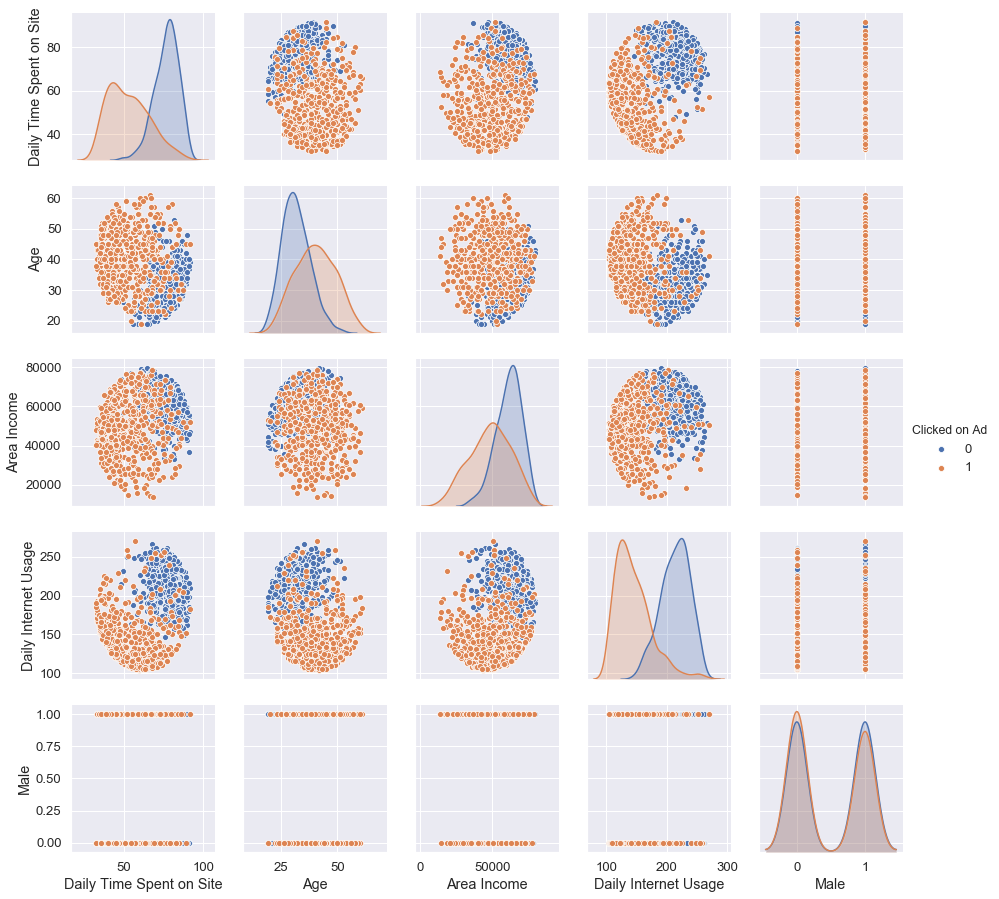

In [5]:
sns.pairplot(df,hue='Clicked on Ad')

In [6]:
x = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [8]:
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

**1. LogisticRegression model**

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model_1=LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_predict_1=model_1.predict(x_test)
y_predict_1

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [13]:
y_test

521    1
737    1
740    1
660    1
411    0
      ..
408    1
332    1
208    1
613    0
78     1
Name: Clicked on Ad, Length: 200, dtype: int64

In [14]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [15]:
accuracy_score(y_test,y_predict_1)

0.9

In [16]:
confusion_matrix(y_test,y_predict_1)

array([[85,  4],
       [16, 95]], dtype=int64)

**2. SVM model**

In [17]:
from sklearn.svm import SVC

In [18]:
model_2=SVC(kernel='linear')

In [19]:
model_2.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
y_predict_2=model_2.predict(x_test)

In [21]:
y_test

521    1
737    1
740    1
660    1
411    0
      ..
408    1
332    1
208    1
613    0
78     1
Name: Clicked on Ad, Length: 200, dtype: int64

In [22]:
accuracy_score(y_test,y_predict_2)

0.935

In [23]:
confusion_matrix(y_test,y_predict_2)

array([[ 85,   4],
       [  9, 102]], dtype=int64)

**3. Decision Tree**

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_3 = DecisionTreeClassifier()

In [25]:
model_3.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
y_predict_3=model_3.predict(x_test)
y_predict_3

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [27]:
y_test

521    1
737    1
740    1
660    1
411    0
      ..
408    1
332    1
208    1
613    0
78     1
Name: Clicked on Ad, Length: 200, dtype: int64

In [28]:
accuracy_score(y_test,y_predict_3)

0.925

**4. KNN**

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
scores = []
for k in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

In [35]:
scores

[0.775,
 0.68,
 0.68,
 0.67,
 0.675,
 0.675,
 0.66,
 0.665,
 0.655,
 0.67,
 0.66,
 0.645,
 0.665,
 0.65,
 0.645,
 0.65,
 0.64,
 0.635,
 0.655,
 0.64,
 0.66,
 0.64,
 0.655,
 0.64,
 0.66,
 0.66,
 0.665,
 0.66,
 0.66,
 0.66,
 0.66,
 0.66,
 0.66,
 0.665,
 0.66,
 0.66,
 0.66,
 0.665,
 0.66,
 0.66,
 0.665,
 0.66,
 0.665,
 0.66,
 0.66,
 0.66,
 0.66,
 0.66,
 0.66]

In [36]:
k=np.argmax(scores)+1
k

1

In [37]:
model_4=KNeighborsClassifier(n_neighbors=k)

In [38]:
model_4.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [39]:
y_predict_4=model_4.predict(x_test)
y_predict_4

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [40]:
y_test

521    1
737    1
740    1
660    1
411    0
      ..
408    1
332    1
208    1
613    0
78     1
Name: Clicked on Ad, Length: 200, dtype: int64

In [41]:
accuracy_score(y_test,y_predict_4)

0.775

In [42]:
confusion_matrix(y_test,y_predict_4)

array([[69, 20],
       [25, 86]], dtype=int64)

**5. Naive_bayes**

In [43]:
from sklearn.naive_bayes import MultinomialNB

In [44]:
model_5=MultinomialNB()

In [45]:
model_5.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
y_predict_5=model_5.predict(x_test)
y_predict_5

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [47]:
y_test

521    1
737    1
740    1
660    1
411    0
      ..
408    1
332    1
208    1
613    0
78     1
Name: Clicked on Ad, Length: 200, dtype: int64

In [48]:
accuracy_score(y_test,y_predict_5)

0.845

In [49]:
confusion_matrix(y_test,y_predict_5)

array([[78, 11],
       [20, 91]], dtype=int64)

In [52]:
dic={'Logistic':accuracy_score(y_test,y_predict_1),
     'SVM':accuracy_score(y_test,y_predict_2),
     'Decision tree':accuracy_score(y_test,y_predict_3),
    'KNN':accuracy_score(y_test,y_predict_4),
    'Naive bayes':accuracy_score(y_test,y_predict_5)}
comparison=pd.DataFrame(dic,index=['Accuracy'])
comparison

,Logistic,SVM,Decision tree,KNN,Naive bayes
Accuracy,0.9,0.935,0.925,0.775,0.845


>> **SVM gives the best accuracy in this data , that means SVM is a good model for small data that contains more than one feature**

>> **Also Decision tree model gives a good accuracy**

**The previos results without using any feature scaling or feature engineering , and I 've used only numerical data**

**==================================================================**

**By using feature engineering**

In [53]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [66]:
df=pd.get_dummies(df,columns=['Ad Topic Line','City','Country','Timestamp'],drop_first=True)

In [67]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Ad Topic Line_Adaptive asynchronous attitude,Ad Topic Line_Adaptive context-sensitive application,Ad Topic Line_Adaptive contextually-based methodology,Ad Topic Line_Adaptive demand-driven knowledgebase,...,Timestamp_2016-07-21 23:14:35,Timestamp_2016-07-22 07:44:43,Timestamp_2016-07-22 11:05:10,Timestamp_2016-07-23 04:04:42,Timestamp_2016-07-23 04:37:05,Timestamp_2016-07-23 05:21:39,Timestamp_2016-07-23 06:18:51,Timestamp_2016-07-23 11:46:28,Timestamp_2016-07-23 14:47:23,Timestamp_2016-07-24 00:22:16
0,68.95,35,61833.90,256.09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,51.30,45,67782.17,134.42,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,51.63,51,42415.72,120.37,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,55.55,19,41920.79,187.95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [92]:
x=df.drop('Clicked on Ad',axis=1)
y=df['Clicked on Ad']

In [93]:
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Ad Topic Line_Adaptive asynchronous attitude,Ad Topic Line_Adaptive context-sensitive application,Ad Topic Line_Adaptive contextually-based methodology,Ad Topic Line_Adaptive demand-driven knowledgebase,Ad Topic Line_Adaptive uniform capability,...,Timestamp_2016-07-21 23:14:35,Timestamp_2016-07-22 07:44:43,Timestamp_2016-07-22 11:05:10,Timestamp_2016-07-23 04:04:42,Timestamp_2016-07-23 04:37:05,Timestamp_2016-07-23 05:21:39,Timestamp_2016-07-23 06:18:51,Timestamp_2016-07-23 11:46:28,Timestamp_2016-07-23 14:47:23,Timestamp_2016-07-24 00:22:16
0,68.95,35,61833.90,256.09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,51.30,45,67782.17,134.42,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,51.63,51,42415.72,120.37,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,55.55,19,41920.79,187.95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
x_scaled=scaler.fit_transform(x)

In [95]:
x_scaled

array([[ 0.24926659, -0.11490498,  0.50969109, ..., -0.0316386 ,
        -0.0316386 , -0.0316386 ],
       [ 0.96113227, -0.57042523,  1.00253021, ..., -0.0316386 ,
        -0.0316386 , -0.0316386 ],
       [ 0.28208309, -1.13982553,  0.35694859, ..., -0.0316386 ,
        -0.0316386 , -0.0316386 ],
       ...,
       [-0.84377541,  1.707176  , -0.93857029, ..., -0.0316386 ,
        -0.0316386 , -0.0316386 ],
       [-0.59638946, -1.93698596, -0.97548353, ..., -0.0316386 ,
        -0.0316386 , -0.0316386 ],
       [-1.26155474, -1.13982553, -1.87383208, ..., -0.0316386 ,
        -0.0316386 , -0.0316386 ]])

In [96]:
x_scaled=pd.DataFrame(x_scaled,columns=[x.columns])
x_scaled

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Ad Topic Line_Adaptive asynchronous attitude,Ad Topic Line_Adaptive context-sensitive application,Ad Topic Line_Adaptive contextually-based methodology,Ad Topic Line_Adaptive demand-driven knowledgebase,Ad Topic Line_Adaptive uniform capability,...,Timestamp_2016-07-21 23:14:35,Timestamp_2016-07-22 07:44:43,Timestamp_2016-07-22 11:05:10,Timestamp_2016-07-23 04:04:42,Timestamp_2016-07-23 04:37:05,Timestamp_2016-07-23 05:21:39,Timestamp_2016-07-23 06:18:51,Timestamp_2016-07-23 11:46:28,Timestamp_2016-07-23 14:47:23,Timestamp_2016-07-24 00:22:16
0,0.249267,-0.114905,0.509691,1.734030,-0.962695,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
1,0.961132,-0.570425,1.002530,0.313805,1.038750,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
2,0.282083,-1.139826,0.356949,1.287589,-0.962695,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
3,0.577432,-0.798185,-0.014456,1.501580,1.038750,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
4,0.212664,-0.114905,1.408868,1.038731,-0.962695,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.502963,-0.684305,1.222006,0.651314,1.038750,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
996,-0.864601,1.023896,0.953329,-1.038735,1.038750,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
997,-0.843775,1.707176,-0.938570,-1.358924,1.038750,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
998,-0.596389,-1.936986,-0.975484,0.181172,-0.962695,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size =0.2,random_state=42)

In [98]:
x_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Ad Topic Line_Adaptive asynchronous attitude,Ad Topic Line_Adaptive context-sensitive application,Ad Topic Line_Adaptive contextually-based methodology,Ad Topic Line_Adaptive demand-driven knowledgebase,Ad Topic Line_Adaptive uniform capability,...,Timestamp_2016-07-21 23:14:35,Timestamp_2016-07-22 07:44:43,Timestamp_2016-07-22 11:05:10,Timestamp_2016-07-23 04:04:42,Timestamp_2016-07-23 04:37:05,Timestamp_2016-07-23 05:21:39,Timestamp_2016-07-23 06:18:51,Timestamp_2016-07-23 11:46:28,Timestamp_2016-07-23 14:47:23,Timestamp_2016-07-24 00:22:16
29,0.695445,-1.595346,-0.657822,0.679572,-0.962695,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
535,0.868363,-0.456545,1.119698,0.638552,1.038750,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
695,0.535780,0.226735,0.904872,1.463750,-0.962695,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
557,0.925791,-0.912065,0.266717,1.066306,-0.962695,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
836,-0.996498,1.137776,-0.432103,-1.467628,-0.962695,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.456263,-1.253706,-0.629634,1.390824,1.038750,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
270,-1.294371,1.934936,0.604130,-0.273473,1.038750,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
860,1.664163,1.023896,-0.229678,0.060389,1.038750,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
435,-0.526339,0.682255,1.318954,-0.924789,-0.962695,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639


In [99]:
y_train

29     0
535    0
695    0
557    0
836    1
      ..
106    0
270    1
860    1
435    1
102    0
Name: Clicked on Ad, Length: 800, dtype: int64

In [100]:
x_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Ad Topic Line_Adaptive asynchronous attitude,Ad Topic Line_Adaptive context-sensitive application,Ad Topic Line_Adaptive contextually-based methodology,Ad Topic Line_Adaptive demand-driven knowledgebase,Ad Topic Line_Adaptive uniform capability,...,Timestamp_2016-07-21 23:14:35,Timestamp_2016-07-22 07:44:43,Timestamp_2016-07-22 11:05:10,Timestamp_2016-07-23 04:04:42,Timestamp_2016-07-23 04:37:05,Timestamp_2016-07-23 05:21:39,Timestamp_2016-07-23 06:18:51,Timestamp_2016-07-23 11:46:28,Timestamp_2016-07-23 14:47:23,Timestamp_2016-07-24 00:22:16
521,-0.109822,-0.798185,-0.015859,-1.356873,1.038750,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
737,0.393154,1.821056,-1.005280,-1.308332,-0.962695,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
740,-1.348645,0.226735,0.503965,-1.019820,1.038750,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
660,-1.448987,1.479416,0.919083,0.048083,-0.962695,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
411,0.863314,-0.798185,0.837245,0.639236,-0.962695,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,-0.840620,1.479416,-0.293294,1.791687,-0.962695,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
332,-0.549058,1.479416,0.927135,-1.020048,1.038750,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
208,-0.346479,2.504336,-1.183431,-0.892656,-0.962695,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639
613,0.707435,-0.570425,0.808102,1.115302,1.038750,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,...,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639,-0.031639


In [101]:
y_test

521    1
737    1
740    1
660    1
411    0
      ..
408    1
332    1
208    1
613    0
78     1
Name: Clicked on Ad, Length: 200, dtype: int64

**1. Logistic Regrission**

In [102]:
logistic_model=LogisticRegression()

In [103]:
logistic_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
y_pred_1=logistic_model.predict(x_test)
y_pred_1

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [105]:
y_test

521    1
737    1
740    1
660    1
411    0
      ..
408    1
332    1
208    1
613    0
78     1
Name: Clicked on Ad, Length: 200, dtype: int64

In [107]:
accuracy_score(y_test,y_pred_1)

0.91

In [108]:
confusion_matrix(y_test,y_pred_1)

array([[87,  2],
       [16, 95]], dtype=int64)

**2. SVM**

In [124]:
svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [125]:
y_pred_2=svm_model.predict(x_test)

In [126]:
y_pred_2

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [127]:
accuracy_score(y_test,y_pred_2)

0.915

In [128]:
confusion_matrix(y_test,y_pred_2)

array([[88,  1],
       [16, 95]], dtype=int64)

**3.Desision tree**

In [117]:
dec_tree_model=DecisionTreeClassifier()
dec_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [119]:
y_pred_3=dec_tree_model.predict(x_test)
y_pred_3

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [120]:
accuracy_score(y_test,y_pred_3)

0.925

In [121]:
confusion_matrix(y_test,y_pred_3)

array([[ 82,   7],
       [  8, 103]], dtype=int64)

**4. KNN**

In [123]:
#Elbow method
scores = []
for k in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
scores

[0.55, 0.46, 0.485, 0.45, 0.455, 0.445, 0.49, 0.45, 0.47]

In [129]:
knn_model=KNeighborsClassifier()

In [130]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [132]:
y_pred_4=knn_model.predict(x_test)
y_pred_4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [133]:
y_test

521    1
737    1
740    1
660    1
411    0
      ..
408    1
332    1
208    1
613    0
78     1
Name: Clicked on Ad, Length: 200, dtype: int64

In [134]:
accuracy_score(y_test,y_pred_4)

0.455

In [136]:
confusion_matrix(y_test,y_pred_4)

array([[ 89,   0],
       [109,   2]], dtype=int64)

**Naive Bayes**

In [140]:
naive_model=MultinomialNB()


In [141]:
naive_model.fit(x_train,y_train)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [145]:
dic_1={'Logistic':accuracy_score(y_test,y_pred_1),
     'SVM':accuracy_score(y_test,y_pred_2),
     'Decision tree':accuracy_score(y_test,y_pred_3),
    'KNN':accuracy_score(y_test,y_pred_4),
    }
comparison_1=pd.DataFrame(dic_1,index=['Accuracy'])
comparison_1

,Logistic,SVM,Decision tree,KNN
Accuracy,0.91,0.915,0.925,0.455


In [147]:
# old results (without featre scaling)
comparison

,Logistic,SVM,Decision tree,KNN,Naive bayes
Accuracy,0.9,0.935,0.925,0.775,0.845


**>> KNN model become slower after increasing the data "aftre doing feature scaling" , and gave a bad accuracy**

**>> SVM model gives better accuracy with small datasets ,its accuracy dicreased after doing feature scaling on the data"dimentions of the data become <1000 rows × 3207 columns>"**

**>> Logistic model accurcy hasn't changed much before and after feature scaling on small data set**

**>> so , We can use SVM & Decision tree model if we work on small data**